The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


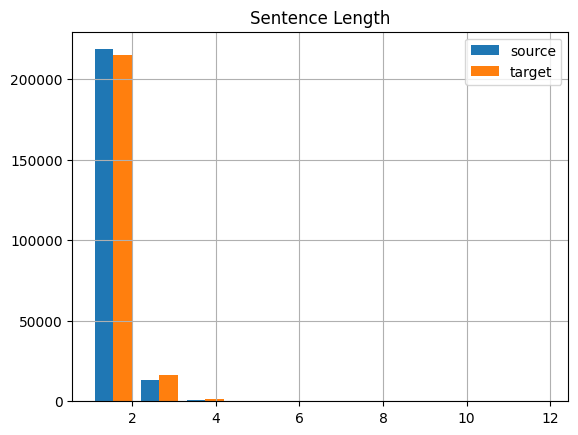

In [19]:
%load_ext autoreload
%autoreload 2
from naml.dataset import Datasets, DatasetRemote
datasets = Datasets("~/naml-data")

sep = ',!?.:;'

table = datasets.fetch(DatasetRemote(
    "fra-eng", "https://www.manythings.org/anki/fra-eng.zip"
)).as_zip().read('fra.txt').decode('utf-8').lower()

lines = table.split('\n')
lines = [line for line in lines]
lines = [line.split('\t')[:2] for line in lines]
lines = [line for line in lines if len(line) == 2]
source, target = [line[0] for line in lines], [line[-1] for line in lines]
for c in sep:
    source = [line.replace(c, f'\t{c}') for line in source]
    target = [line.replace(c, f'\t{c}') for line in target]
source = [line.split('\t') for line in source]
target = [line.split('\t') for line in target]

from naml import plot
plot.histogram(
    [[len(x) for x in source],[len(x) for x in target]],
    legend=['source', 'target'],
    title='Sentence Length',    
)
